In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [2]:
!ls ./out && ls ./data

bus_id_encoder.pickle	   cleaned_train.csv  route_id_encoder.pickle
busstop_id_encoder.pickle  output1.csv
routes.csv  sample_submission.csv  stops.csv  test.csv	training.csv


In [3]:
bus_id_encoder     = pickle.load(open("./out/bus_id_encoder.pickle"    , "rb"))
route_id_encoder   = pickle.load(open("./out/route_id_encoder.pickle"  , "rb"))
busstop_id_encoder = pickle.load(open("./out/busstop_id_encoder.pickle", "rb"))

In [4]:
dummy_buses = [325819008, 451509115]
print("bus ids", dummy_buses)
print("bus categorical ids", bus_id_encoder.transform(dummy_buses))

dummy_routes = [11100010, 11100012]
print("route ids", dummy_routes)
print("route categorical ids", route_id_encoder.transform(dummy_routes))

dummy_busstops = [388, 112]
print("busstop ids", dummy_busstops)
print("busstop categorical ids", busstop_id_encoder.transform(dummy_busstops))


bus ids [325819008, 451509115]
bus categorical ids [578 664]
route ids [11100010, 11100012]
route categorical ids [3 4]
busstop ids [388, 112]
busstop categorical ids [387 111]


In [5]:
dataset_df  = pd.read_csv("./out/cleaned_train.csv")

In [6]:
dataset_df

,DAY_OF_WEEK,HOUR_OF_DAY,MINUTE_OF_HOUR,SECOND_OF_MINUTE,TIME,BUS_ID,BUSROUTE_ID,BUSSTOP_ID,TIMESTAMP_DIFF,ROUTE_TIME,SEQ_NUM
0,0,7,28,25,5305,0,3,17,117.0,0.817500,21.0
1,0,7,30,22,5422,0,3,10,123.0,0.817500,21.0
2,0,7,32,25,5545,0,3,8,121.0,0.817500,21.0
3,0,7,34,26,5666,0,3,5,136.0,0.817500,21.0
4,0,7,36,42,5802,0,3,3,174.0,0.817500,21.0
...,...,...,...,...,...,...,...,...,...,...,...
3130654,6,22,27,3,59223,995,271,10,123.0,0.903056,13.0
3130655,6,22,29,6,59346,995,271,8,185.0,0.903056,13.0
3130656,6,22,32,11,59531,995,271,5,99.0,0.903056,13.0
3130657,6,22,33,50,59630,995,271,3,225.0,0.903056,13.0


In [7]:
dataset_input = dataset_df[['DAY_OF_WEEK', 'HOUR_OF_DAY', 'MINUTE_OF_HOUR', 'SECOND_OF_MINUTE', 'TIME', 'BUS_ID', 'BUSROUTE_ID', 'BUSSTOP_ID', 'ROUTE_TIME', 'SEQ_NUM']]
dataset_label = dataset_df[['TIMESTAMP_DIFF']]

In [8]:
xgb_model = xgb.XGBRegressor()

In [9]:
%time xgb_model.fit(dataset_input, dataset_label, verbose=True)

CPU times: user 12min 58s, sys: 3.31 s, total: 13min 2s
Wall time: 3min 49s


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

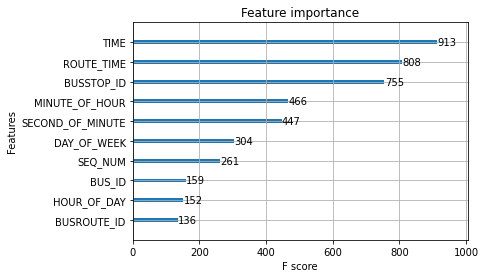

In [10]:
xgb.plot_importance(xgb_model)

In [11]:
xgb_model.score(dataset_input, dataset_label)

0.9308660468535913

In [12]:
predictions = xgb_model.predict(dataset_input)
mean_absolute_error(predictions, dataset_label)

99.17959860417399